In [2]:
import xarray as xr

filepath = "FCH4_upscale_BorealArctic_weekly_2002-2021.nc"
data = xr.open_dataset(filepath)

display(data)

<xarray.Dataset>
Dimensions:             (nv: 2, time: 1040, lon: 720, lat: 90)
Coordinates:
  * nv                  (nv) int32 1 2
  * time                (time) datetime64[ns] 2002-01-04 ... 2021-12-27
  * lon                 (lon) float64 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat                 (lat) float64 89.5 89.0 88.5 88.0 ... 46.12 45.62 45.12
Data variables:
    crs                 int32 ...
    time_bnds           (time, nv) datetime64[ns] ...
    FCH4_weekly_mean    (time, lat, lon) float64 ...
    FCH4_weekly_std     (time, lat, lon) float64 ...
    Boreal_Arctic_mask  (lat, lon) float64 ...
Attributes:
    time_period:            2002-2021
    title:                  CMS-CH4-BA: Boreal Arctic Wetland CH4 emissions f...
    contact:                Qing Zhu (LBNL, qzhu@lbl.gov)
    source:                 Simulation performed for the wetland CH4 study of...
    reference:              Yuan et al. (2024) in Nature Climate Change 14:28...
    created:                by Qing Zhu in March 2024
    publisher_type:         institution
    publisher_institution:  Oak Ridge National Laboratory Distributed Active ...
    publisher_url:          daac.ornl.gov
    publisher_email:        uso@daac.ornl.gov

In [3]:
import xarray as xr
import pandas as pd

filepath = "FCH4_upscale_BorealArctic_weekly_2002-2021.nc"
ds = xr.open_dataset(filepath)

print(ds) 

time = ds['time'].values  # Extract time as numpy array
CH4_emission = ds['FCH4_weekly_mean'].mean(dim=["lon", "lat"]).values  # Aggregate spatially

#convert to pandas DataFrame
time_df = pd.to_datetime(time)  # Convert time to pandas datetime format
data = pd.DataFrame({
    "YYYY": time_df.year,
    "MM": time_df.month,
    "DD": time_df.day,
    "CH4": CH4_emission
})

data['time'] = time_df 
data = data.set_index('time') 

mean = data['CH4'].resample("YS").mean() 
#'YS' for year start

mean = mean.reset_index() 
mean.columns = ['Year', 'Mean_CH4']

print(mean)

<xarray.Dataset>
Dimensions:             (nv: 2, time: 1040, lon: 720, lat: 90)
Coordinates:
  * nv                  (nv) int32 1 2
  * time                (time) datetime64[ns] 2002-01-04 ... 2021-12-27
  * lon                 (lon) float64 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat                 (lat) float64 89.5 89.0 88.5 88.0 ... 46.12 45.62 45.12
Data variables:
    crs                 int32 ...
    time_bnds           (time, nv) datetime64[ns] ...
    FCH4_weekly_mean    (time, lat, lon) float64 ...
    FCH4_weekly_std     (time, lat, lon) float64 ...
    Boreal_Arctic_mask  (lat, lon) float64 ...
Attributes:
    time_period:            2002-2021
    title:                  CMS-CH4-BA: Boreal Arctic Wetland CH4 emissions f...
    contact:                Qing Zhu (LBNL, qzhu@lbl.gov)
    source:                 Simulation performed for the wetland CH4 study of...
    reference:              Yuan et al. (2024) in Nature Climate Change 14:28...
    created:               

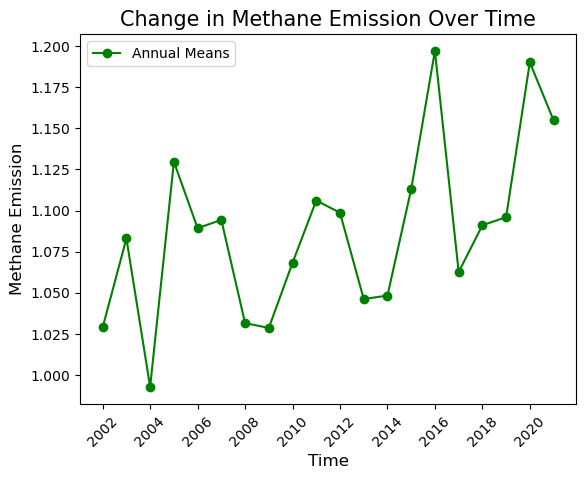

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
x = mean['Year']
y = mean['Mean_CH4']

axs.plot(x, y, marker = 'o', c = 'green', label = 'Annual Means')
axs.set_xlabel("Time", fontsize = 12)
axs.set_ylabel("Methane Emission", fontsize = 12)
axs.set_title("Change in Methane Emission Over Time", fontsize = 15)

import matplotlib.dates as mdates 
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
axs.tick_params(axis='x', labelrotation=45) 

axs.legend()

In [ ]:
from scipy import stats

mean['Year_1'] = pd.to_datetime(mean['Year'], errors='coerce').dt.year

# Perform linear regression
methane_slope, methane_intercept, methane_r, methane_p, methane_stdarr = stats.linregress(mean['Year_1'], mean['Mean_CH4'])

# Print results
print(f"Slope: {methane_slope}")
print(f"R-value: {methane_r}")

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
x = mean['Year']
y = mean['Mean_CH4']

axs.plot(x, y, marker = 'o', c = 'darkgreen', label = 'Annual Means')
axs.set_xlabel("Time", fontsize = 12)
axs.set_ylabel("Methane Emission", fontsize = 12)
axs.set_title("Change in Methane Emission Over Time", fontsize = 15)

import matplotlib.dates as mdates 
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
axs.tick_params(axis='x', labelrotation=45) 

axs.legend()

methane_fit = mean['Year_1'] * methane_slope + methane_intercept
axs.plot(mean['Year'], methane_fit, '--', c = 'green', label = 'Methane Fit')